In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train.shape

(42000, 785)

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train = train.loc[:,'label']
X_train = train.drop('label',axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 48)

1


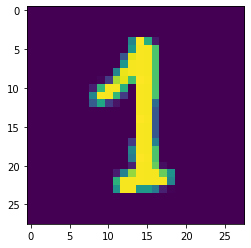

In [ ]:
plt.imshow(np.array(x_train.iloc[0]).reshape(28,28))
print(y_train.iloc[0])

In [ ]:
x_train.shape

(37800, 784)

In [ ]:
x_train = np.array(x_train).reshape(x_train.shape[0],28,28,1)
x_test = np.array(x_test).reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = np.array(y_train)

In [ ]:
#plt.imshow(x_train[0])
print("label:", y_train[0])

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Model Creation**

In [ ]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,steps_per_epoch = np.ceil(x_train.shape[0]/32), validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1182/1182 [==============================] - 73s 61ms/step - loss: 0.1686 - accuracy: 0.9487 - val_loss: 0.0546 - val_accuracy: 0.9824
Epoch 2/50
1182/1182 [==============================] - 72s 61ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0465 - val_accuracy: 0.9871
Epoch 3/50
1182/1182 [==============================] - 71s 60ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 4/50
1182/1182 [==============================] - 72s 60ms/step - loss: 0.0275 - accuracy: 0.9906 - val_loss: 0.0460 - val_accuracy: 0.9888
Epoch 5/50
1182/1182 [==============================] - 72s 61ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0410 - val_accuracy: 0.9893
Epoch 6/50
1182/1182 [==============================] - 72s 61ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 7/50
1182/1182 [==============================] - 72s 61ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0405 -

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(28000, 784)

In [ ]:
test = np.array(test).reshape(test.shape[0],28,28,1)

In [ ]:
test.shape

(28000, 28, 28, 1)

In [ ]:
test = test/ 255

In [ ]:
prediction_probabilities = model.predict(test)

In [ ]:
len(prediction_probabilities)

28000

In [ ]:
prediction = []
for i in range(len(prediction_probabilities)):
    prediction.append(list(prediction_probabilities[i]).index(max(prediction_probabilities[i])))

In [ ]:
df = pd.DataFrame({'ImageId' : range(1,len(prediction)+1),'Label' : prediction})

In [ ]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
df.to_csv('submission.csv',index=False)